## Twitter Sentiment Analysis using Python 

##### This article covers the sentiment analysis of any topic by parsing the tweets fetched from Twitter using Python.

#### What is sentiment analysis?
Sentiment Analysis is the process of ‘computationally’ determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker.

#### Why sentiment analysis?

Business: In marketing field companies use it to develop their strategies, to understand customers’ feelings towards products or brand, how people respond to their campaigns or product launches and why consumers don’t buy some
products.
Politics: In political field, it is used to keep track of political view, to detect consistency and inconsistency between statements and actions at the government level. It can be used to predict election results as well!
Public Actions: Sentiment analysis also is used to monitor and analyse social phenomena, for the spotting of potentially dangerous situations and determining the general mood of the blogosphere.

Installation:

Tweepy: tweepy is the python client for the official Twitter API.
Install it using following pip command (Run this command in anaconda command prompt)

python pip install tweepy

TextBlob: textblob is the python library for processing textual data.
Install it using following pip command (Run this command in anaconda command prompt)

pip install textblob

Also, we need to install some NLTK corpora using following command:
    python -m textblob.download_corpora
    (Corpora is nothing but a large and structured set of texts.)
    
Authentication:
In order to fetch tweets through Twitter API, one needs to register an App through their twitter account. Follow these steps for the same:

Open this link and click the button: ‘Create New App’
Fill the application details. You can leave the callback url field empty.
Once the app is created, you will be redirected to the app page.
Open the ‘Keys and Access Tokens’ tab.
Copy ‘Consumer Key’, ‘Consumer Secret’, ‘Access token’ and ‘Access Token Secret’.

==================================

Consumer API keys
hnjI1KEt7hKfuGB4ccJfd3WCl (API key)

gA4baG8GRJtQUiUmObSHaHPgjtwquLTUUTVwCihffxtf9j6dGG (API secret key)


Access token & access token secret
163056342-DSgdl0jvOjFVNBLw5f5FVtd9qI81zSOmYiwenKwh (Access token)

5IFPsRDTYmHcVSwgeZ6sy0vgvYMthjvuvpDjTsxW01S92 (Access token secret)


import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 

https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/

## REGEX 

Adding \ before a character removes its special functions

[] means everything inside these brackets will be looked for

a-z will cover all the values between a and z

@ will look for @ in the email or other text

re.sub is for substituting values in the tweet with " ", for values we have mentioned in our regex

(@[A-Za-z0-9]+) + :
nick22910@gmail.com ==> 'nick22910 .com'
without + : 'nick22910 mail.com' #Here it just replaces @ and first letter after that

'|'
A|B, where A and B can be arbitrary REs, creates a regular expression that will match either A or B. An arbitrary number of REs can be separated by the '|' in this way. This can be used inside groups (see below) as well. As the target string is scanned, REs separated by '|' are tried from left to right. When one pattern completely matches, that branch is accepted. This means that once A matches, B will not be tested further, even if it would produce a longer overall match. In other words, the '|' operator is never greedy. To match a literal '|', use \|, or enclose it inside a character class, as in [|].

'^'
(Caret.) Matches the start of the string, and in MULTILINE mode also matches immediately after each newline.

\s
When the UNICODE flag is not specified, it matches any whitespace character, this is equivalent to the set [ \t\n\r\f\v]. The LOCALE flag has no extra effect on matching of the space. If UNICODE is set, this will match the characters [ \t\n\r\f\v] plus whatever is classified as space in the Unicode character properties database.

\S
When the UNICODE flag is not specified, matches any non-whitespace character; this is equivalent to the set [^ \t\n\r\f\v] The LOCALE flag has no extra effect on non-whitespace match. If UNICODE is set, then any character not marked as space in the Unicode character properties database is matched

Let's understand how this regex works:

(@[A-Za-z0-9]+) in "nick22910@gmail.com  asd@43*()" returns 'nick22910 .com  asd *()'

Adding |([^0-9A-Za-z \t]) to above statement returns 'nick22910  com  asd    '
Just the above statement returns : 'nick22910 gmail com  asd 43   ' i.e removes all the special characters

.split() converts elements into individual strings : ['nick22910', 'com', 'asd']


## JOIN()

This method returns a string, which is the concatenation of the strings in the sequence seq. The separator between elements is the string providing this method.

For example:
s = "-";
seq = ("a", "b", "c"); # This is sequence of strings.
print s.join( seq )

Output : a-b-c



##### Tweets is list of parsed_tweets, which means it has basically dictionary values stored in it, each tweet in tweets has a text and sentiment
   
 ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
 
 for in tweets, we are checking if i['sentiment'] == 'negative' then append this i in ntweets 

pip install sns 
pip install python-twitter
https://docs.python.org/2/library/re.html

In [12]:
import re 
import matplotlib.pyplot as plt 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 
import numpy as np

class TwitterClient(object): 
    ''' 
    Generic Twitter Class for sentiment analysis. 
    '''
    def __init__(self):
        ''' 
        Class constructor or initialization method. 
        '''
        # keys and tokens from the Twitter Dev Console 
        consumer_key = 'hnjI1KEt7hKfuGB4ccJfd3WCl'
        consumer_secret = 'gA4baG8GRJtQUiUmObSHaHPgjtwquLTUUTVwCihffxtf9j6dGG'
        access_token = '163056342-DSgdl0jvOjFVNBLw5f5FVtd9qI81zSOmYiwenKwh'
        access_token_secret = '5IFPsRDTYmHcVSwgeZ6sy0vgvYMthjvuvpDjTsxW01S92'

        # attempt authentication 
        try: 
            # create OAuthHandler object 
            self.auth = OAuthHandler(consumer_key, consumer_secret) 
            # set access token and secret 
            self.auth.set_access_token(access_token, access_token_secret) 
            # create tweepy API object to fetch tweets 
            self.api = tweepy.API(self.auth) 
        except: 
            print("Error: Authentication Failed") 

    def clean_tweet(self, tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 

    def get_tweet_sentiment(self, tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(self.clean_tweet(tweet)) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'

    def get_tweets(self, query, count = 10): 
        ''' 
        Main function to fetch tweets and parse them. 
        '''
        # empty list to store parsed tweets 
        tweets = [] 

        try: 
            # call twitter api to fetch tweets 
            fetched_tweets = self.api.search(q = query, count = count, lang='en') 

            # parsing tweets one by one 
            for tweet in fetched_tweets: 
                # empty dictionary to store required params of a tweet 
                parsed_tweet = {} 

                # saving text of tweet 
                parsed_tweet['text'] = tweet.text 
                # saving sentiment of tweet 
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text) 

                # appending parsed tweet to tweets list 
                if tweet.retweet_count > 0: 
                    # if tweet has retweets, ensure that it is appended only once 
                    if parsed_tweet not in tweets: 
                        tweets.append(parsed_tweet) 
                else: 
                    tweets.append(parsed_tweet) 

            # return parsed tweets 
            return tweets 

        except tweepy.TweepError as e: 
            # print error (if any) 
            print("Error : " + str(e)) 



 


iPHONE XS:
Positive tweets percentage: 55.88235294117647 %
Negative tweets percentage: 2.9411764705882355 %
Neutral tweets percentage: 41.1764705882353 % 
 


iPHONE XR:
Positive tweets percentage: 37.66233766233766 %
Negative tweets percentage: 5.194805194805195 %
Neutral tweets percentage: 57.142857142857146 % 
 




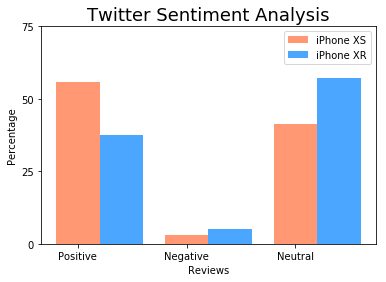

In [13]:
def main(): 
    # creating object of TwitterClient Class 
    api = TwitterClient() 
    # calling function to get tweets 
    tweets_XS = api.get_tweets(query = 'Iphone XS', count = 10000)
    tweets_XR = api.get_tweets(query = 'Iphone XR', count = 10000)
    
    print(" \n\n")  
    print("iPHONE XS:")
    # picking positive tweets from tweets 
    ptweets_XS = [tweet for tweet in tweets_XS if tweet['sentiment'] == 'positive'] 
    # percentage of positive tweets 
    print("Positive tweets percentage: {} %".format(100*len(ptweets_XS)/len(tweets_XS))) 
    pper_XS = (100*len(ptweets_XS)/len(tweets_XS))
    
    # picking negative tweets from tweets
    ntweets_XS = [tweet for tweet in tweets_XS if tweet['sentiment'] == 'negative'] 
    # percentage of negative tweets 
    print("Negative tweets percentage: {} %".format(100*len(ntweets_XS)/len(tweets_XS))) 
    nper_XS = (100*len(ntweets_XS)/len(tweets_XS))
    
    # picking neutral tweets from tweets 
    neutraltweets_XS = [tweet for tweet in tweets_XS if tweet['sentiment'] == 'neutral'] 
    # percentage of neutral tweets 
    print("Neutral tweets percentage: {} % ".format(100*len(neutraltweets_XS)/len(tweets_XS))) 
    neuper_XS = (100*len(neutraltweets_XS)/len(tweets_XS))
    
    print(" \n\n")
   
    print("iPHONE XR:")    
    # picking positive tweets from tweets 
    ptweets_XR = [tweet for tweet in tweets_XR if tweet['sentiment'] == 'positive'] 
    # percentage of positive tweets 
    print("Positive tweets percentage: {} %".format(100*len(ptweets_XR)/len(tweets_XR))) 
    pper_XR = (100*len(ptweets_XR)/len(tweets_XR))
    
    # picking negative tweets from tweets
    ntweets_XR = [tweet for tweet in tweets_XR if tweet['sentiment'] == 'negative'] 
    # percentage of negative tweets 
    print("Negative tweets percentage: {} %".format(100*len(ntweets_XR)/len(tweets_XR))) 
    nper_XR = (100*len(ntweets_XR)/len(tweets_XR))
    
    # picking neutral tweets from tweets 
    neutraltweets_XR= [tweet for tweet in tweets_XR if tweet['sentiment'] == 'neutral'] 
    # percentage of neutral tweets 
    print("Neutral tweets percentage: {} % ".format(100*len(neutraltweets_XR)/len(tweets_XR))) 
    neuper_XR = (100*len(neutraltweets_XR)/len(tweets_XR))
    
      
    print(" \n\n")
    
    group_names=['Positive', 'Negative', 'Neutral']
       
    group_XS=[pper_XS,nper_XS,neuper_XS]
    group_XR=[pper_XR,nper_XR,neuper_XR]
 
    fig, ax = plt.subplots()
    groups = 3
    bar_width = 0.4
    opacity = 0.8
    index = np.arange(groups)

    rect1 = plt.bar(index, group_XS, bar_width,alpha=opacity,color='coral',label='iPhone XS')
    rect2 = plt.bar(index + bar_width, group_XR, bar_width,alpha=opacity,color='dodgerblue',label='iPhone XR')
    
    plt.title('Twitter Sentiment Analysis', fontsize=18)
    plt.xlabel('Reviews')
    plt.ylabel('Percentage')
    
    plt.xticks(index, ('Positive','Negative','Neutral'))
    ax.set_yticks([0, 25, 50, 75])
    plt.legend()
    
    # printing first 5 positive tweets 
 #   print("\n\nPositive tweets:") 
 #  for tweet in ptweets[:5]: 
 #       print(tweet['text']) 

    # printing first 5 negative tweets 
 #   print("\n\nNegative tweets:") 
 #   for tweet in ntweets[:5]: 
 #       print(tweet['text']) 
     
if __name__ == "__main__": 
    # calling main function
    main() 
